### The dilution factor pseudo batch transformation method
Lets begin with taking a look the method. The dilution factor pseudo batch transformation use a dilation factor calculated for each measurement point ($DF_i$).

$$DF_i = \frac{V_i}{V_{i-1}}$$

where $V_i$ is the volume of the bioreactor at measurement point $i$. This is then used to calculate the accumulated dilution factor

$$ADF_i = \prod_1^i DF_i$$

Finally, the accumulated dilution factor is used to correct the biomass measurements

$$C_{Corrected \: biomass, \: i} = C_{Measured \: biomass, \: i} * ADF_i$$

## Error propagation
I have investigate how to propagate the errors in the dilution factor pseudo batch transformation. The Biolector does not measure the volume but calculates it from the starting volume which is provided by the operator. Therefore, I will express the volume through the following equation

$$V_i = V_{start} + V_{feed, \: i} + V_{base, \: i} - V_{sampling, \: i}$$

where $V_{feed, \: i}$, $V_{base, \: i}$ and $V_{sampling, \: i}$ are the accumulated feed/base/sample volume at measurement point $i$.

Now I can start propagating the error. I will propagate the errors as variances and then finally calculate the relative error in the end. All measurement errors will be incorporated using a coefficient of variance ($CV$), e.g. for a 10% measurement error the coefficient of variance is calculated as 

$$0.1 = \frac{2 \sigma}{\bar \mu} \iff 0.05 = \frac{\sigma}{\bar \mu} = CV$$

Where $\sigma$ is the standard deviation and $\bar \mu$ is the measured value.


Assuming that all volume addition is uncorrelated, the variance of the the total volume can be calculated as follows:

$$\sigma_{V_i}^2 = \sigma_{V_{start}}^2 + \sigma_{V_{feed, \: i}}^2 + \sigma_{V_{base, \: i}}^2 - \sigma_{V_{sampling, \: i}}^2$$

Starting with the **sampling variance:**

$$\sigma_{V_{sampling, \: i}}^2 = \sum_0^i \sigma_{V_{sample, \: i}}^2 = \sum_0^i (V_{sample, \: i} * CV_{sample, \: i})^2$$

From the m2labs I read that the Robolector has a 5% error when pipetting (https://www.m2p-labs.com/bioreactors/robolector/robolector-xl/). Which I interpret as the 95% relative error. Thus the variance for one sample becomes

$$\sigma_{V_{sampling, \: i}}^2  = \sum_0^i (V_{sample, \: i} * 0.025)^2$$

**Initial volume variance:** I will assume that when we added the initial volume we have a 10% pipetting error

$$\sigma_{V_{start}}^2 = (V_{start} * CV_{initial \: volume})^2 = (V_{start} * 0.05)^2$$

**Feeding variance:** The feed is supplied by a microfluidic pump in the cultivation plate. M2labs states that the liquid transfer has a CV of 6% (https://www.m2p-labs.com/bioreactors/microtiter-plates/microfluidic-flowerplate/). I principle the error should be calculated summing op the volume each of pump stroke

$$\sigma_{V_{feed, \: i}}^2 = \sum_{k=0}^{strokes(i)} (V_{stroke, \: k} * 0.06)^2$$

where $strokes(i)$ is the number of strokes from t=0 to measurement point i. Unfortunately, the number of strokes is not available. Therefore, I will instead use the total volume added between two measurement points. 

$$\sigma_{V_{feed, \: i}}^2 = \sum_0^i((V_{feed, \: i} - V_{feed, \: i-1}) * CV_{pump})^2 $$


I will now move on to calculate the **variance of the dilution factor**. The dilution factor is calculated as 

$$DF_i = \frac{V_i}{V_{i-1}}$$

The volumes $V_i$ and $V_{i-1}$ are not independent there for the covariance is included in the variance propagation.

$$\sigma_{DF_i}^2 = DF_i^2 * (\frac{\sigma_{V_i}^2}{V_i^2} + \frac{\sigma_{V_{i-1}}^2}{V_{i-1}^2} - 2\frac{\sigma_{V_iV_{i-1}}}{V_i * V_{i-1}})$$

Therefore, I need to derive the covariance between two volume measurements $\sigma_{V_iV_{i-1}} = Cov[V_i, V_{i-1}]$. From my Time series book eq 2.37 I know that $Cov[X + U, Y] = Cov[X,Y] + Cov[U, Y]$. Because the volume measurements are generated by adding all the volumes together I can expressed $V_i$ in terms of the previous volume and the added volume.

$$V_i = V_{i-1} - V_{sample, \: i} + V_{feed, \: i} + V_{base, \: i}$$

If I now denote $U = - V_{sample, \: i} + V_{feed, \: i} + V_{base, \: i}$, the the covariance becomes

$$Cov[V_{i-1} + U, V_{i-1}] = Cov[V_{i-1},V_{i-1}] + Cov[U, V_{i-1}] = Var[V_{i-1}] = \sigma_{V_{i-1}}^2$$

because $Cov[V_{i-1},V_{i-1}] = Var[V_{i-1}]$ and $Cov[U, V_{i-1}]=0$ as $U$ and $V_{i-1}$ are independent. Thus I can insert this in the equation for $\sigma_{DF_i}^2$

$$\sigma_{DF_i}^2 = DF_i^2 * (\frac{\sigma_{V_i}^2}{V_i^2} + \frac{\sigma_{V_{i-1}}^2}{V_{i-1}^2} - 2\frac{\sigma_{V_{i-1}}^2}{V_i * V_{i-1}})$$

Now, I can consider the **accumulated dilution factor**

$$ADF_i = \prod_1^i DF_i$$

If the $DF_i$ was independent the variance would be calculated using the following equation

$$\sigma_{ADF_i}^2 = ADF^2 \sum_0^i \frac{\sigma_{DF_i}^2}{DF_i^2}$$

This leads to an accumulation of the variance which I doubt is correct. In the case that $DF_{i}$ and $DF_{i-1}$ are dependent the variance should be calculated as follows.

$$\sigma_{ADF_i}^2 = ADF^2 \sum_1^i \frac{\sigma_{DF_i}^2}{DF_i^2} + \frac{\sigma_{DF_{i-1}}^2}{DF_{i-1}^2} + 2\frac{\sigma_{DF_i DF_{i-1}}}{DF_i DF_{i-1}}$$

but I got stock here and can't really find out how to derive the covariance between $DF_i$ and $DF_{i-1}$ ($\sigma_{DF_i DF_{i-1}}$). *Do you have any suggestions?*

To move on I finally calculated **variance of the corrected biomass concentration**. The corrected biomass concentration is calculated by

$$C_{Corrected \: biomass, \: i} = C_{Measured \: biomass, \: i} * ADF_i$$

Thus the error propagates as follows

$$\sigma_{C_{Corrected \: biomass, \: i}}^2 =C_{Corrected \: biomass, \: i}^2 (\sigma_{C_{Measured \: biomass, \: i}}^2 + \sigma_{ADF_i}^2)$$

### Error propagation example
I implemented the above error propagation and used it to calculate the variance of the light scatter values of one of the growth curves from the Biolector. Here I load the data and plot the raw growth curve.

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# setup working directory
project_folder = "/Users/s143838/projects/aaa_omics/"
os.chdir(project_folder) # sets working directory 

In [12]:
# import biolector data
dat = pd.read_csv('data/processed/20221029_CFB2/cfb2_tidy_combined.csv')

In [13]:
# calculate dilution factors from biolector data
from scripts.functions import calc_dilution_factor
dilution_factor_funciton_wrap = (lambda x: calc_dilution_factor(df = x, 
                                time_colname = 'Feeding time', 
                                volume_colname = 'Volumes', 
                                sample_volume_colname = 'Volume',
                                correct_cols=['Biomass [Gain=3]']))
dat_trans = (dat
    .groupby(['Biolector well']) 
    .apply(dilution_factor_funciton_wrap) # apply dilution factor transformaiton to each time series
    .drop(columns=['Biolector well']) # apply returns index from the groupby, i.e. Biolecotor well. These are also present in the returned dataframe. To remove them .reset_index is required, but this first requires that the columns of the same name are removed from the data set 
    .reset_index()
)

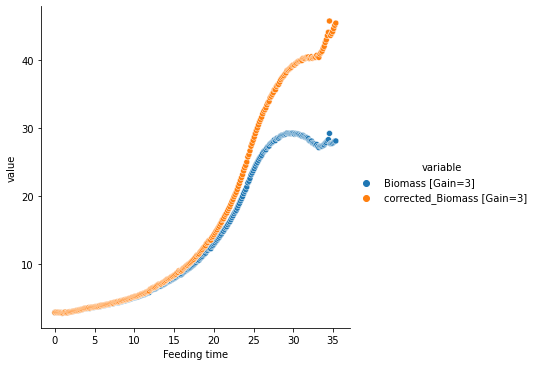

In [14]:
# plots raw and corrected light scatter values
dat_example = dat_trans.query("Feeding == True & \
        `Biolector well` == 'E08' & \
        `Feeding time`.diff(1) > 0.0001") # removes the "just after" sampling time points
(dat_example
        .filter(['Feeding time', 'Biomass [Gain=3]', 'corrected_Biomass [Gain=3]'])
        .melt(id_vars= ['Feeding time'])
        .pipe((sns.relplot, 'data'), x='Feeding time', y='value', hue='variable')
)


The following hold my implementation of the error/variance propagation.

In [15]:

def propagate_initial_volume_var(initial_volume, pipetting_cv):
    # calculates absolute error of the initial volume
    return (pipetting_cv * initial_volume)**2

def propagate_sampling_volume_var(df, sample_volume_colname, pipetting_cv):    
    # calculate variance (sigma^2) from sampling
    V_sample = df.loc[:,sample_volume_colname] # sample volumes nan
    var_V_sample = (V_sample * pipetting_cv)**2 # (sampling volume * pipetting coefficient of variance)^2
    var_V_sampling = var_V_sample.cumsum() # sums all previous sampling variances
    filled_var_V_sampling = var_V_sampling.ffill() # forward fill vector so all measurements between samples gets the sampling variances of the previous sampling variances                                 
    return filled_var_V_sampling 

def propagate_feed_volume_var(df, feed_volume_colname, liquid_transfer_cv):
    # works for any fed volume
    V_feed_diff = df.loc[:, feed_volume_colname].diff()
    var_V_feed_diff = (V_feed_diff* liquid_transfer_cv)**2
    var_V_feed = var_V_feed_diff.cumsum() # var_V_{feed, i}^2 error of accumulated feed at measurement i
    filled_var_V_feed = (var_V_feed#.ffill()
                        .fillna(0)) # fill the first value with 0
    return filled_var_V_feed

def combine_volume_vars(df:pd.DataFrame, var_V_colnames: list) -> pd.Series:
    return df.filter(var_V_colnames).sum(axis='columns')

def propagate_dilution_factor_var(df, volume_colname, volume_var_colname, dilution_factor_colname):
    '''
    Propagates the variance of the dilution factor

    sigma_{DF_i}^2 = DF_i^2 * ((sigma_{V_i} / V_i)^2 + (sigma_{V_{i-1}} / V_{i-1})^2 + (sigma_{V_{i}V_{i-1}} / V_{i}V_{i-1})^2)
    sigma_{V_{i}V_{i-1}} is the covariance of V_{i} and V_{i-1} 
    '''
    var_DF = [np.nan] # variance of first dilution factor cannot be calculated
    
    for i in range(1, df.shape[0]):

        V_i = df.filter([volume_colname]).iloc[i].to_numpy() # V_i
        V_im1 = df.filter([volume_colname]).iloc[i-1].to_numpy() # V_{i-1}
        var_V_im1 = (df.filter([volume_var_colname]).iloc[i-1]).to_numpy() # variance of V_{i-1}
        var_V_i = (df.filter([volume_var_colname]).iloc[i]).to_numpy() # variance of V_{i}
        DF_i = (df.filter([dilution_factor_colname]).iloc[i]).to_numpy() # Dilution factor i
        covar_V_i_im1 = var_V_im1 # Cov[V_i, V_{i-1}] = Var[V_{i-1}]

        var_DF_i = DF_i**2 * ((var_V_i / V_i**2) + (var_V_im1 / V_im1**2) + (2* covar_V_i_im1 / (V_i * V_im1)))
        var_DF.append(var_DF_i[0]) # append to collection series, var_DF_i is an array with one element

    return pd.Series(var_DF, index = df.index) # creates series and match indexes with the input dataframe 

def propagate_accum_dilution_factor_var(df, dilution_factor_colname, dilution_factor_var_colname, accum_dilution_factor_colname):
    '''
    Calculates an estimate the variance of the accumulated dilution factor. 

    NB assuming that the DF_k and DF_{k-1} are uncorrelated, which I belieave is wrong!

    sigma^2_ADF_i = ADF^2_i * (sum(sigma^2_DF_k / DF_k, for k=0 to k=i)
    '''    
    return df[accum_dilution_factor_colname]**2 * (df[dilution_factor_var_colname] / df[dilution_factor_colname]**2).cumsum()

def calc_relerror_from_variance(df, quatity_colname, var_colname):
    '''
    Calcaulates the the 95% relative error, assuming normal distribution.
    '''
    return np.sqrt(df[var_colname]) * 2 / df[quatity_colname]

def propagate_corrected_biomass_var(df, corrected_biomass_colname, var_biomass_colname, biomass_colname, ADF_colname, var_ADF_colname):
    '''
    \sigma_{C_{Corrected \: biomass, \: i}}^2 = C_{Corrected \: biomass, \: i}^2 (\sigma_{C_{Measured \: biomass, \: i}}^2 + \sigma_{ADF_i}^2)
    '''
    return df[corrected_biomass_colname]**2 * ((df[var_biomass_colname]/df[biomass_colname]**2) + (df[var_ADF_colname]/df[ADF_colname]**2))

And now calculate the propagated variances.

In [16]:
initial_volume = 900 # initial volume of well

# coefficient of variance 66% errors
measured_biomass_cv = 0.1/2
inital_volume_cv = 0.1/2 
pip_samples_cv = 0.05/2
liquid_transfer_cv = 0.06

# data column names in data frame 
base_colname = 'MF Volume (A)'
feed_colname = 'MF Volume (B)'
sample_volume_colname = 'Volume'
well_volume = 'Volumes'
dilution_factor_colname = 'dilution_factor'
accum_dilution_factor_colname = 'accum_dilution_factor'

# calculate variances
dat_example = (dat_example
    .assign(var_V_start = propagate_initial_volume_var(initial_volume, inital_volume_cv))
    .assign(var_V_sampling = lambda df: propagate_sampling_volume_var(df, sample_volume_colname, pip_samples_cv))
    .assign(var_V_feed = lambda df: propagate_feed_volume_var(df, feed_colname, liquid_transfer_cv))
    .assign(var_V_base = lambda df: propagate_feed_volume_var(df, base_colname, liquid_transfer_cv))
    .assign(var_V = lambda df: combine_volume_vars(df, ['var_V_start', 'var_V_sampling', 'var_V_feed', 'var_V_base']))
    .assign(var_DF = lambda df: propagate_dilution_factor_var(df, well_volume, 'var_V', dilution_factor_colname))
    .assign(var_ADF = lambda df: propagate_accum_dilution_factor_var(df, dilution_factor_colname, 'var_DF', accum_dilution_factor_colname))
    .assign(var_biomass = lambda df: df['Biomass [Gain=3]'] * measured_biomass_cv)
    .assign(var_corrected_biomass = lambda df: propagate_corrected_biomass_var(df, 'corrected_Biomass [Gain=3]', 'var_biomass', 'Biomass [Gain=3]', accum_dilution_factor_colname, 'var_ADF'))
)

Now I will take a look at the errors of the individual quantities. I will calculate the error as $m \pm 2\sigma$, where $m$ is the the measured value.

#### Volume

<ErrorbarContainer object of 3 artists>

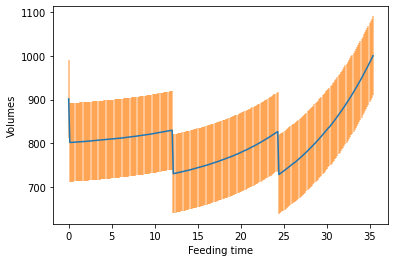

In [17]:
ax = dat_example.pipe((sns.lineplot, 'data'), x='Feeding time', y='Volumes')
x_coords = dat_example.loc[:,'Feeding time'].to_numpy()
y_coords = dat_example.loc[:,'Volumes'].to_numpy()
errors = np.sqrt(dat_example['var_V']) * 2 # 2 * sqrt(sigma^2)
ax.errorbar(x_coords, y_coords, yerr=errors,fmt=' ', zorder=-1, alpha=0.6)

The error of the volume is dominated by the initial pipetting error estimated to 10 %.

#### Dilution factor

<ErrorbarContainer object of 3 artists>

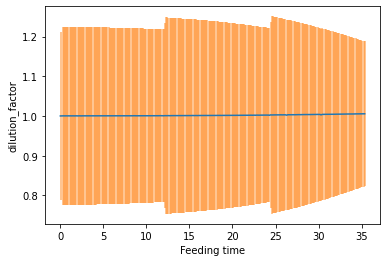

In [18]:
ax = dat_example.pipe((sns.lineplot, 'data'), x='Feeding time', y='dilution_factor')
x_coords = dat_example.loc[:,'Feeding time'].to_numpy()
y_coords = dat_example.loc[:,'dilution_factor'].to_numpy()
errors = np.sqrt(dat_example['var_DF']) * 2 # 2 * sqrt(sigma^2)
ax.errorbar(x_coords, y_coords, yerr=errors,fmt=' ', zorder=-1, alpha=0.6)


The error in the dilution factor decrease between sampling points as the covariance term in increases. 

$$\sigma_{DF_i}^2 = DF_i^2 * (\frac{\sigma_{V_i}^2}{V_i^2} + \frac{\sigma_{V_{i-1}}^2}{V_{i-1}^2} - 2\frac{\sigma_{V_iV_{i-1}}}{V_i * V_{i-1}})$$

But at the sampling timepoints the covariance between $V_i$ and $V_{i-1}$ becomes vary small, hence the sudden increases in error.

#### Accumulated dilution factor

<ErrorbarContainer object of 3 artists>

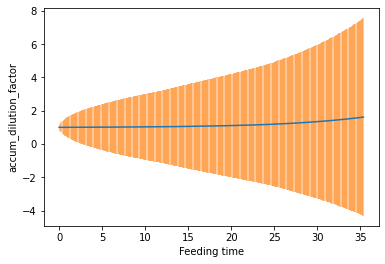

In [19]:
ax = dat_example.pipe((sns.lineplot, 'data'), x='Feeding time', y='accum_dilution_factor')
x_coords = dat_example.loc[:,'Feeding time'].to_numpy()
y_coords = dat_example.loc[:,'accum_dilution_factor'].to_numpy()
errors = np.sqrt(dat_example['var_ADF']) * 2 # 2 * sqrt(sigma^2)
ax.errorbar(x_coords, y_coords, yerr=errors,fmt=' ', zorder=-1, alpha=0.6)


In this implementation the error accumulates through the accumulated dilution factor. This is because I assume that the covariance of dilutions factors is zero, which I doubt is correct.

#### Corrected biomass

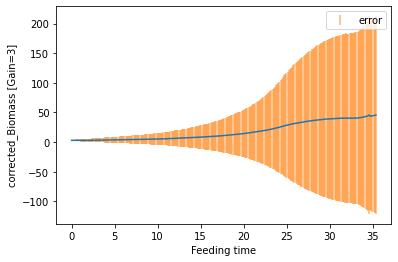

In [20]:
ax = dat_example.pipe((sns.lineplot, 'data'), x='Feeding time', y='corrected_Biomass [Gain=3]')
x_coords = dat_example.loc[:,'Feeding time'].to_numpy()
y_coords = dat_example.loc[:,'corrected_Biomass [Gain=3]'].to_numpy()
errors = np.sqrt(dat_example['var_corrected_biomass']) * 2 # 2 * sqrt(sigma^2)
ax.errorbar(x_coords, y_coords, yerr=errors,fmt=' ', zorder=-1, alpha=0.6, label='error')
ax.legend()

The accumulation of error in the accumulated dilution factor leads to a very large error in the corrected biomass values.

#### Final remarks
As of now the dilution factor pseudo batch correction seems to inflate the error, but as earlier stated I think that I propagate the error through the ADF wrong. I suspect that the covariance ($\sigma_{DF_i DF_{i-1}}$) will be negative therefore the variance of ADF will be stabilized. 

$$\sigma_{ADF_i}^2 = ADF^2 \sum_1^i \frac{\sigma_{DF_i}^2}{DF_i^2} + \frac{\sigma_{DF_{i-1}}^2}{DF_{i-1}^2} + 2\frac{\sigma_{DF_i DF_{i-1}}}{DF_i DF_{i-1}}$$

The question is if it stabilizes the variance enough to make the corrected values useful.

#### You can disregard the following
In the last part i tested how the error reacts to different levels of error in the initial volume. This is mainly for my own reference and later use if I find the correct way to propagate the variance of the accumulated dilution factor.

In [21]:
# test different initial volume errors
dat_example = dat_trans.query("Feeding == True & \
        `Biolector well` == 'E08' & \
        `Feeding time`.diff(1) > 0.0001") # removes the "just after" sampling time points

df_collect = pd.DataFrame()
lst_initial_volume_cv = [0.05, 0.025, 0]
for initial_volume_cv in lst_initial_volume_cv:
    df_collect = df_collect.append(dat_example
        .assign(initial_volume_cv = initial_volume_cv)
        .assign(var_V_start = propagate_initial_volume_var(initial_volume, initial_volume_cv))
        .assign(var_V_sampling = lambda df: propagate_sampling_volume_var(df, sample_volume_colname, pip_samples_cv))
        .assign(var_V_feed = lambda df: propagate_feed_volume_var(df, feed_colname, liquid_transfer_cv))
        .assign(var_V_base = lambda df: propagate_feed_volume_var(df, base_colname, liquid_transfer_cv))
        .assign(var_V = lambda df: combine_volume_vars(df, ['var_V_start', 'var_V_sampling', 'var_V_feed', 'var_V_base']))
        .assign(var_DF = lambda df: propagate_dilution_factor_var(df, 'Volumes', 'var_V', 'dilution_factor'))
        .assign(var_ADF = lambda df: propagate_accum_dilution_factor_var(df, 'dilution_factor', 'var_DF', 'accum_dilution_factor'))
        .assign(var_biomass = lambda df: df['Biomass [Gain=3]'] * measured_biomass_cv)
        .assign(var_corrected_biomass = lambda df: propagate_corrected_biomass_var(df, 'corrected_Biomass [Gain=3]', 'var_biomass', 'Biomass [Gain=3]', 'accum_dilution_factor', 'var_ADF'))
        .assign(dCorrected_biomass = lambda df: np.sqrt(df['var_corrected_biomass']) * 2) # 2 * sqrt(sigma^2))
        )


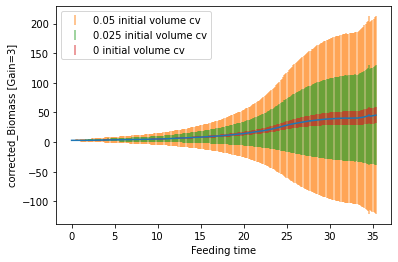

In [22]:
# plotting
ax = dat_example.pipe((sns.lineplot, 'data'), x='Feeding time', y='corrected_Biomass [Gain=3]')

x_coords = dat_example.loc[:,'Feeding time'].to_numpy()
y_coords = dat_example.loc[:,'corrected_Biomass [Gain=3]'].to_numpy()

for initial_volume_cv in lst_initial_volume_cv:

    errors = df_collect.query("initial_volume_cv == @initial_volume_cv").loc[:,'dCorrected_biomass'].to_numpy()
    ax.errorbar(x_coords, y_coords, yerr=errors,fmt=' ', zorder=-1, alpha=0.6, label=f'{initial_volume_cv} initial volume cv')
    ax.legend(loc='upper left')

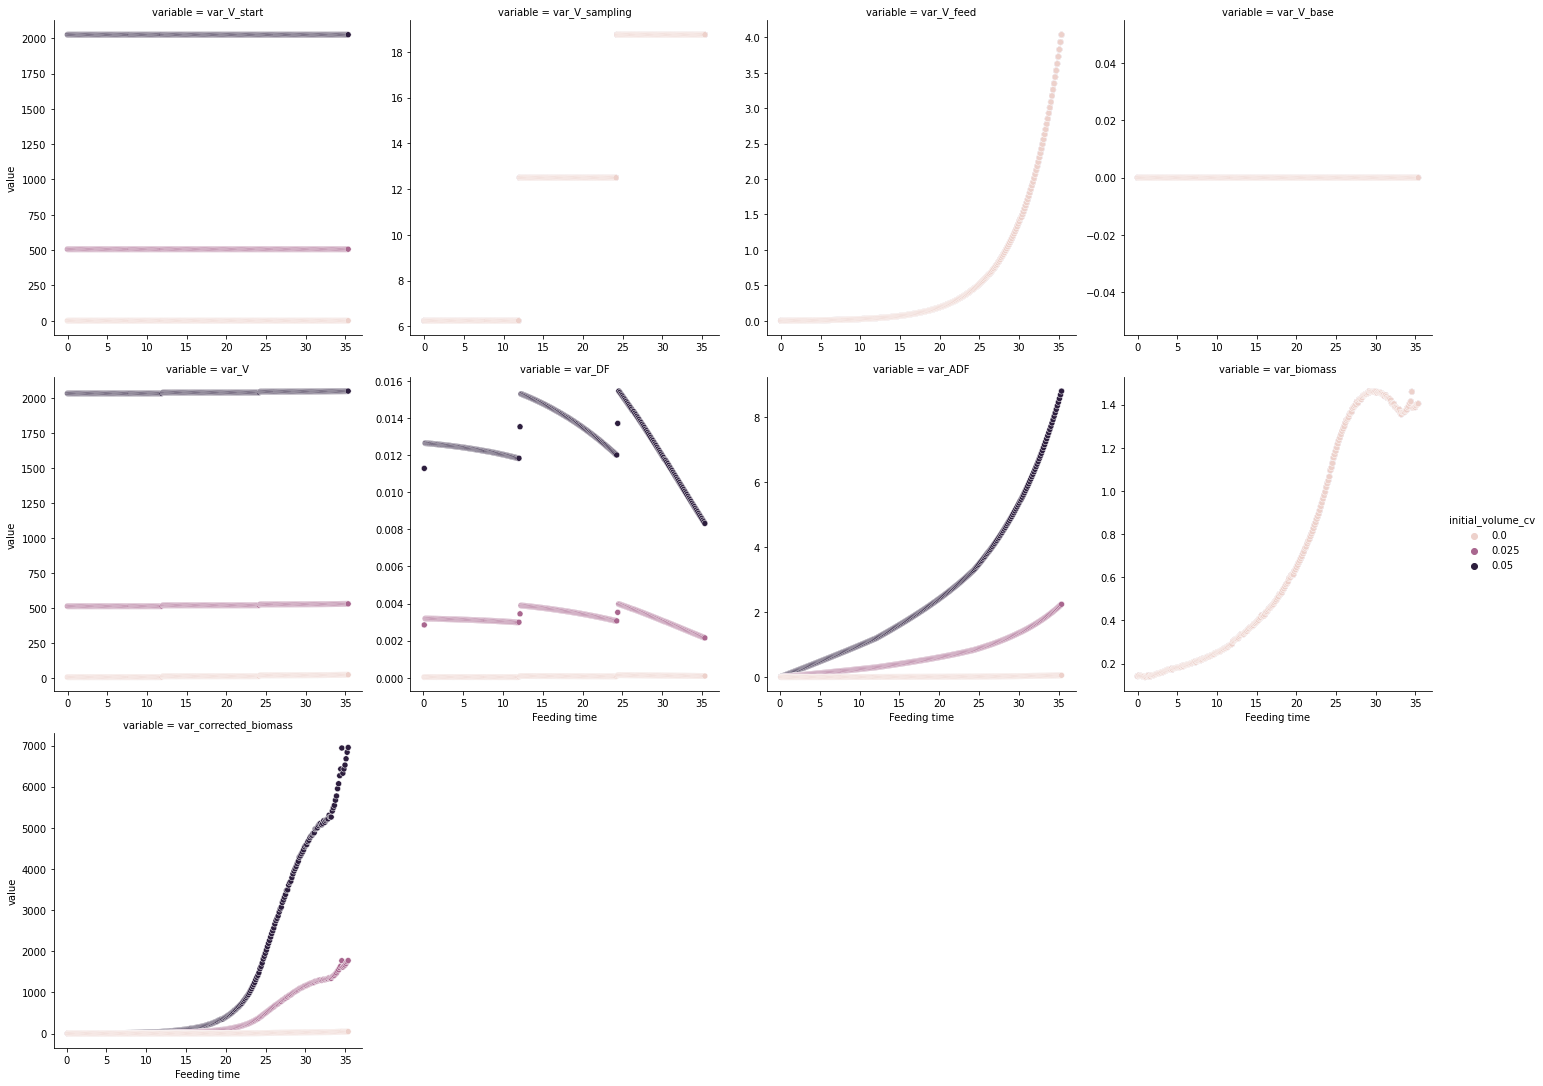

In [23]:
# Showing the individual variances
(df_collect.filter(regex="Feeding time|var_.*|initial_volume_cv")
    .melt(id_vars=['Feeding time', 'initial_volume_cv'])
    .pipe((sns.relplot, 'data'), x= "Feeding time", y='value', col='variable', col_wrap = 4, hue="initial_volume_cv", facet_kws={'sharey': False, 'sharex': False}))